## Reto
Desde la empresa de Twitter realizan preprocesamiento del lenguaje natural (NLP) para la creación de modelos que preprocesen y comprendan el lenguaje natural, entiendan la agrupación semántica de las palabras, la conversión de texto en voz, la traducción del lenguaje y mucho más. Se han puesto en contacto con nosotros porque quieren hacer un análisis de sentimiento para interpretar y clasificar las emociones (positivas, negativas y neutras) de sus usuarios contra varias aerolíneas de USA y nos han pedido ayuda.

Su idea es poder identificar el sentimiento del público hacia determinadas palabras o temas y poder filtrar discursos negativos no deseados en sus plataformas.

Nos han proporcionado un dataset parcial que contiene información de los tweets. Responde a las siguientes preguntas razonadamente.

### 1: Análisis de los datos

Para esta actividad se recomienda utilizar el paquete [NLTK](https://www.nltk.org/) (Natural Language Toolkit) de Python.

a) Explora el dataset, ¿cuántas muestras tiene? ¿Qué variables tienen valores nulos? Realiza los procedimientos adecuados para tener un dataset con información constructiva.

b) Divide los tweets en tres grupos: positivos, negativos y neutros, realiza un gráfico de barras de sentimientos de los usuarios para cada aerolínea. ¿Qué aerolíneas tienen comentarios más negativos? ¿Y los comentarios más positivos? Observando los gráficos, ¿qué deduces de los tweets negativos?

c) Para tener una idea de las palabras más frecuentes en los tweets negativos y positivos, representa una idea de palabras con el paquete [wordcloud](https://amueller.github.io/word_cloud/#) de Python. ¿Cuáles son las palabras más frecuentes en tweets con sentimientos negativos? ¿ Y para los positivos?

d) Extrae conclusiones sobre las razones de los sentimientos negativos de los tweets de los clientes representando la distribución de la variable‘negativereason’ para cada aerolínea. ¿Cuál es la razón que genera más sentimientos negativos? ¿Destacarías alguna aerolínea? Justifica tu respuesta.

e) ¿Existe alguna relación entre los sentimientos negativos de los usuarios en las aerolíneas y la fecha? El dataset tiene registros desde 2015-feb-17 hasta 2015-feb-24, justifica tu respuesta mediante la visualización en un gráfico de barras de la distribución de tweets negativos en cada aerolínea para cada fecha. ¿Qué conclusiones obtienes.
 

In [2]:
# Tratamiento de datos
# ================================================================
import numpy as np
import pandas as pd

# Gráficos
# ================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Procesamiento del Lenguaje Natural (NLP)
# ================================================================
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Análisis y Visualización de Sentimientos
# ================================================================

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alex/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [70]:
# Cargar el dataset
file_path = "data/data_r5_2024.csv"
df = pd.read_csv(file_path)
df.head(2).T

,0,1
tweet_id,570306133677760513,570301130888122368
airline_sentiment,neutral,positive
airline_sentiment_confidence,1.0,0.3486
negativereason,NaN,NaN
negativereason_confidence,NaN,0.0
airline,Virgin America,Virgin America
airline_sentiment_gold,NaN,NaN
name,cairdin,jnardino
negativereason_gold,NaN,NaN
retweet_count,0,0


In [71]:
# Pregunta 1a: Exploración del dataset
# ================================================================
num_samples = df.shape[0]
missing_values = df.isnull().sum()

print("Dimension of data", df.shape)
print("Number of samples:",len(df))
dtypes_var = df.dtypes
print("Number of variables:", len(dtypes_var))
dtypes_var

Dimension of data (14640, 15)
Number of samples: 14640
Number of variables: 15


tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [73]:
print("Valores nulos por columna:\n\n", missing_values)

Valores nulos por columna:

 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [74]:
# Eliminar columnas con demasiados valores nulos
cols_to_drop = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord']
df_clean = df.drop(columns=cols_to_drop)

# Llenar valores nulos en 'negativereason' y 'negativereason_confidence' con 'Unknown' y 0 respectivamente
df_clean['negativereason'] = df_clean['negativereason'].fillna('Unknown')
df_clean['negativereason_confidence'] = df_clean['negativereason_confidence'].fillna(0)

# Llenar valores nulos en 'tweet_location' y 'user_timezone' con 'Unknown'
df_clean['tweet_location'] = df_clean['tweet_location'].fillna('Unknown')
df_clean['user_timezone'] = df_clean['user_timezone'].fillna('Unknown')

# Verificar nuevamente los valores nulos
missing_values_clean = df_clean.isnull().sum()
print(f"Missing values after cleaning:\n{missing_values_clean}")

# Guardar el dataset limpio (opcional)
df_clean.to_csv("data/clean_data_r5_2024.csv", index=False)

# Visualización inicial de los datos
df_clean.head(2).T

Missing values after cleaning:
tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64


,0,1
tweet_id,570306133677760513,570301130888122368
airline_sentiment,neutral,positive
airline_sentiment_confidence,1.0,0.3486
negativereason,Unknown,Unknown
negativereason_confidence,0.0,0.0
airline,Virgin America,Virgin America
name,cairdin,jnardino
retweet_count,0,0
text,@VirginAmerica What @dhepburn said.,@VirginAmerica plus you've added commercials t...
tweet_created,2015-02-24 11:35:52 -0800,2015-02-24 11:15:59 -0800


In [75]:
df.head().T

,0,1,2,3,4
tweet_id,570306133677760513,570301130888122368,570301083672813571,570301031407624196,570300817074462722
airline_sentiment,neutral,positive,neutral,negative,negative
airline_sentiment_confidence,1.0,0.3486,0.6837,1.0,1.0
negativereason,NaN,NaN,NaN,Bad Flight,Can't Tell
negativereason_confidence,NaN,0.0,NaN,0.7033,1.0
airline,Virgin America,Virgin America,Virgin America,Virgin America,Virgin America
airline_sentiment_gold,NaN,NaN,NaN,NaN,NaN
name,cairdin,jnardino,yvonnalynn,jnardino,jnardino
negativereason_gold,NaN,NaN,NaN,NaN,NaN
retweet_count,0,0,0,0,0


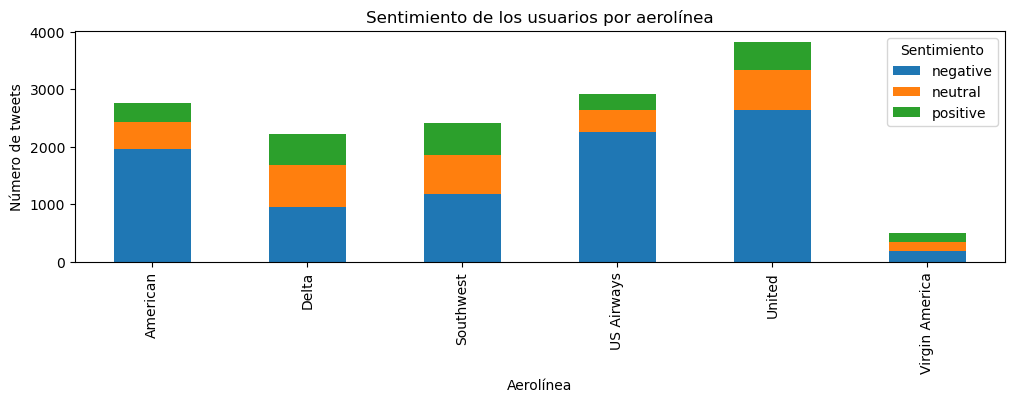

In [76]:
# Pregunta 1b: Dividir los tweets en tres grupos: positivos, negativos y neutros
# ================================================================
# Cargar el dataset limpio
file_path = "data/clean_data_r5_2024.csv"
df_clean = pd.read_csv(file_path)

sentiment_counts = df_clean.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

# Gráfico de barras de sentimientos de los usuarios para cada aerolínea
sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 3))
plt.title('Sentimiento de los usuarios por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de tweets')
plt.legend(title='Sentimiento')
plt.show()

In [77]:
# Analizar aerolíneas con más comentarios negativos y positivos
most_negative_airline = sentiment_counts['negative'].idxmax()
most_positive_airline = sentiment_counts['positive'].idxmax()

print(f"Aerolínea con más comentarios negativos: {most_negative_airline}")
print(f"Aerolínea con más comentarios positivos: {most_positive_airline}")

Aerolínea con más comentarios negativos: United
Aerolínea con más comentarios positivos: Southwest


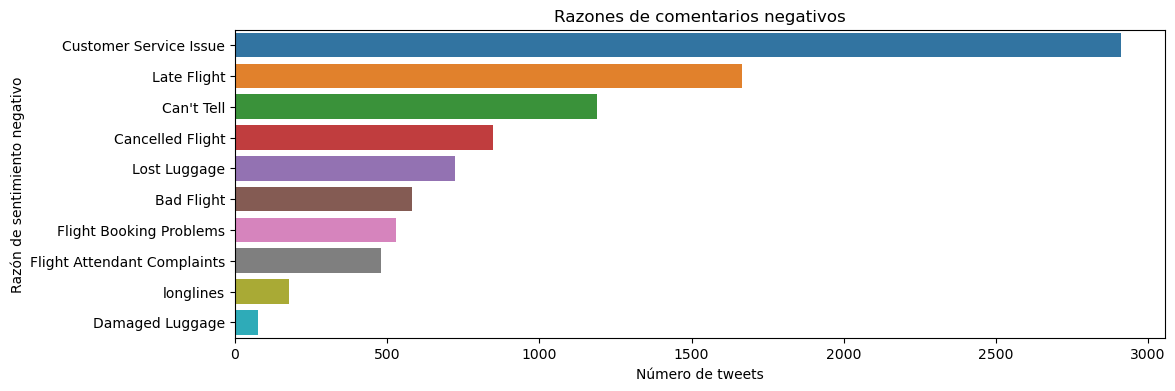

In [78]:
# Observando los gráficos
negative_tweets = df_clean[df_clean['airline_sentiment'] == 'negative']
negative_reason_counts = negative_tweets['negativereason'].value_counts()

plt.figure(figsize=(12, 4))
sns.barplot(x=negative_reason_counts.values, y=negative_reason_counts.index)
plt.title('Razones de comentarios negativos')
plt.xlabel('Número de tweets')
plt.ylabel('Razón de sentimiento negativo')
plt.show()

<div style="background-color: AliceBlue; padding: 10px;">

La razón más común para los comentarios negativos es "Customer Service Issue" (Problema con el servicio al cliente), lo cual es significativamente más alto que otras razones. Esto sugiere que muchos de los problemas percibidos por los usuarios están relacionados con la atención al cliente.

Otras razones destacadas incluyen "Late Flight" (Vuelo retrasado), "Can't Tell" (No puede decir), y "Cancelled Flight" (Vuelo cancelado). Estos problemas relacionados con la puntualidad y la comunicación también contribuyen significativamente a la percepción negativa.

Las razones menos comunes incluyen "Damaged Luggage" (Equipaje dañado) y "Longlines" (Largas filas), aunque todavía son relevantes para algunos usuarios.

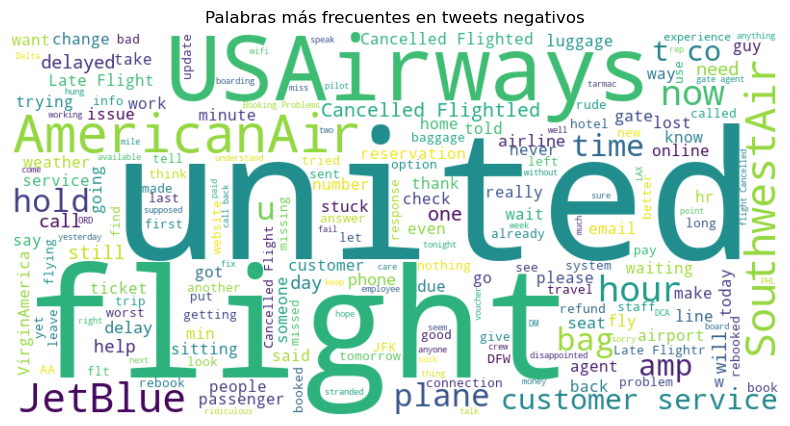

In [79]:
# Pregunta 1c: WordCloud para tweets negativos y positivos
# ================================================================
# Filtrar tweets negativos y positivos
negative_tweets = df_clean[df_clean['airline_sentiment'] == 'negative']
positive_tweets = df_clean[df_clean['airline_sentiment'] == 'positive']

# Unir todos los textos de los tweets negativos y positivos
negative_text = " ".join(tweet for tweet in negative_tweets['text'])
positive_text = " ".join(tweet for tweet in positive_tweets['text'])

# Generar WordCloud para tweets negativos
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Palabras más frecuentes en tweets negativos")
plt.axis("off")
plt.show()

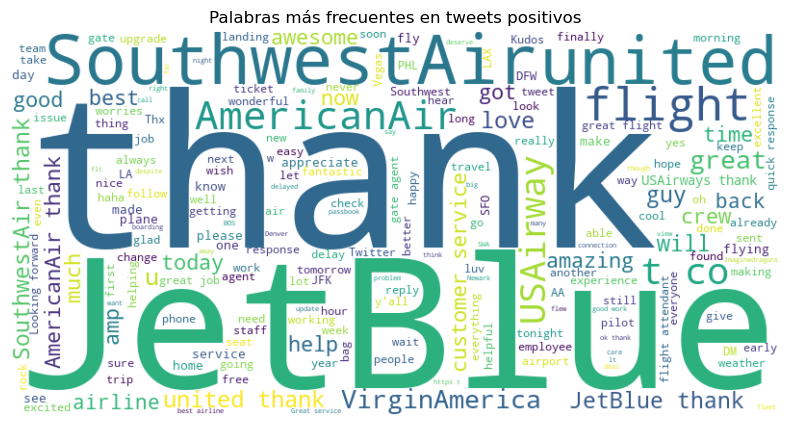

In [80]:
# Generar WordCloud para tweets positivos
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Palabras más frecuentes en tweets positivos")
plt.axis("off")
plt.show()

<div style="background-color: AliceBlue; padding: 10px;">

Tweets Negativos:

United es mencionada con frecuencia en un contexto negativo, indicando problemas frecuentes con esta aerolínea. Los problemas comunes incluyen retrasos, cancelaciones y problemas con el servicio al cliente.

Tweets Positivos:

JetBlue es destacada en un contexto positivo, sugiriendo que los usuarios están satisfechos con esta aerolínea. Las palabras positivas como "thank", "great", "love", "awesome" y "friendly" indican que los usuarios aprecian el buen servicio y las experiencias positivas.

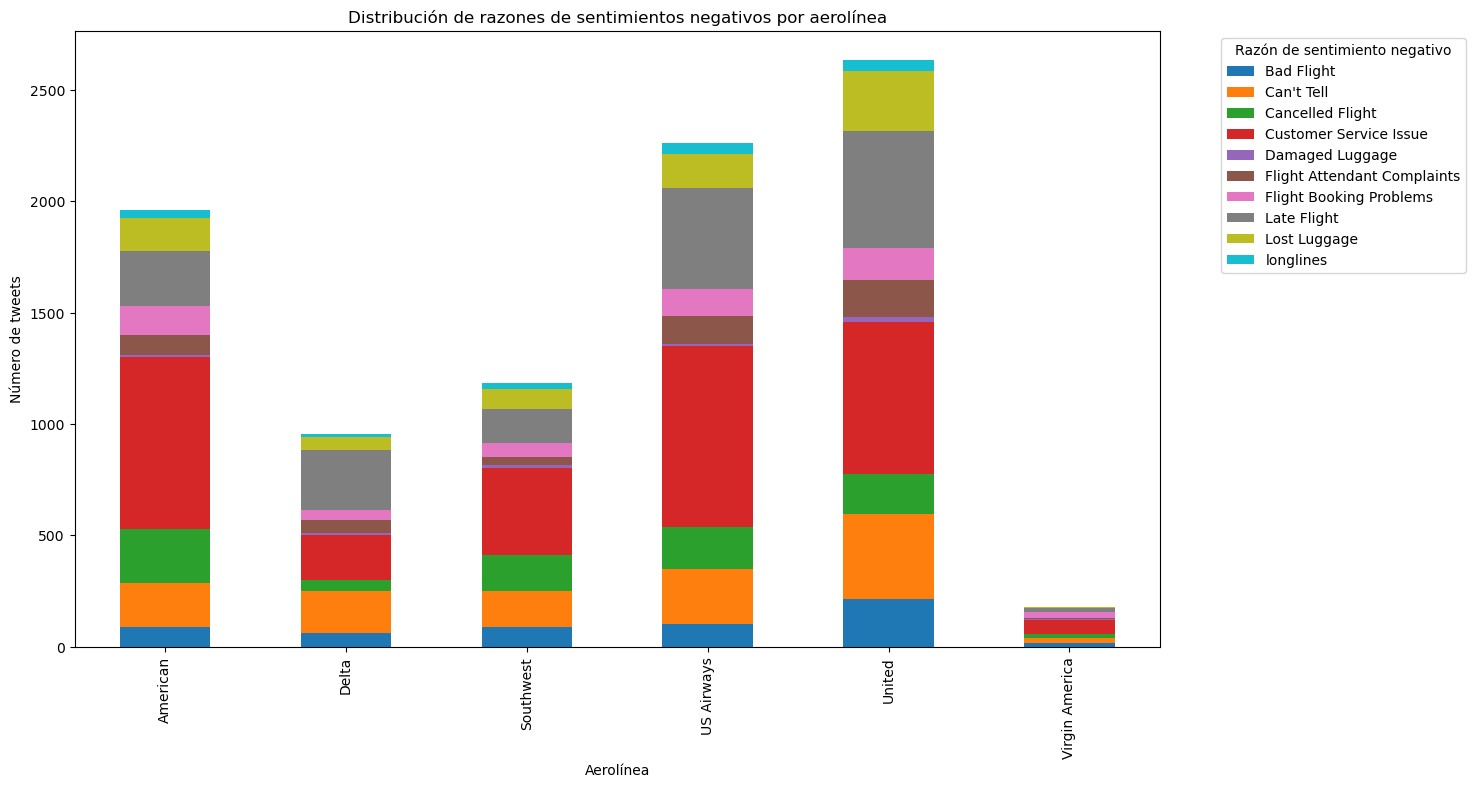

La razón que genera más sentimientos negativos en general es: Customer Service Issue
La aerolínea con más problemas de servicio al cliente es: US Airways


In [81]:
# Pregunta 1d: Distribución de la variable 'negativereason' para cada aerolínea
# ================================================================
# Filtrar tweets negativos
negative_tweets = df_clean[df_clean['airline_sentiment'] == 'negative']

# Contar razones de sentimientos negativos por aerolínea
negative_reason_counts = negative_tweets.groupby(['airline', 'negativereason']).size().unstack(fill_value=0)

# Visualización de la distribución de razones de sentimientos negativos por aerolínea
negative_reason_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribución de razones de sentimientos negativos por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de tweets')
plt.legend(title='Razón de sentimiento negativo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Identificar la razón que genera más sentimientos negativos en general
most_common_negative_reason = negative_tweets['negativereason'].value_counts().idxmax()
print(f"La razón que genera más sentimientos negativos en general es: {most_common_negative_reason}")

# Identificar la aerolínea con más problemas de servicio al cliente
service_issue_counts = negative_tweets[negative_tweets['negativereason'] == 'Customer Service Issue']['airline'].value_counts()
most_affected_airline = service_issue_counts.idxmax()
print(f"La aerolínea con más problemas de servicio al cliente es: {most_affected_airline}")

<div style="background-color: AliceBlue; padding: 10px;">

United y American Airlines tienen la mayor cantidad de problemas relacionados con el servicio al cliente. Esto podría ser un indicador de una necesidad urgente de mejorar sus prácticas de atención al cliente y resolver problemas de manera más eficiente.

Southwest y Virgin America parecen tener una mejor percepción pública, con menos problemas relacionados con el servicio al cliente y otros aspectos operacionales.

US Airways y Delta también tienen áreas de mejora, especialmente en términos de servicio al cliente y puntualidad.

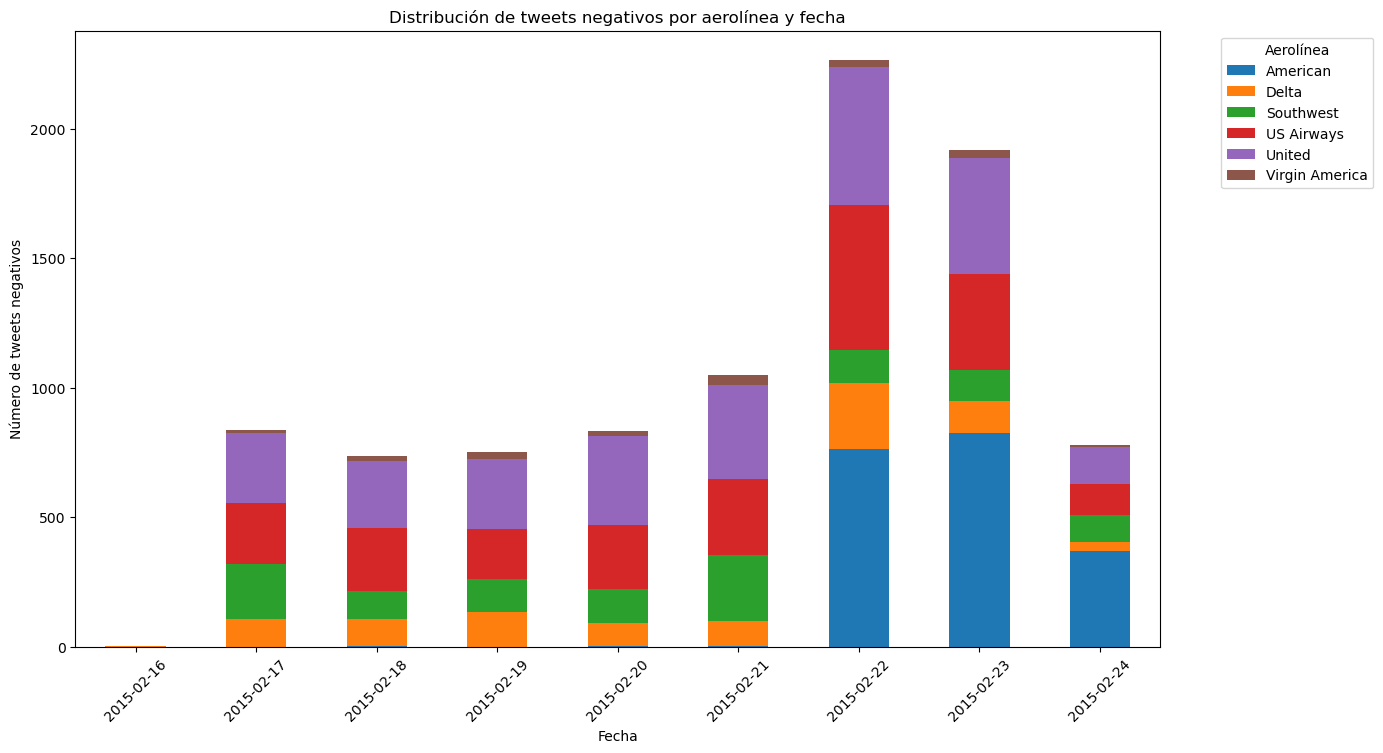

airline,American,Delta,Southwest,US Airways,United,Virgin America
tweet_date,,,,,,
2015-02-16,0,1,0,0,2,0
2015-02-17,0,108,213,233,272,12
2015-02-18,1,105,110,244,257,19
2015-02-19,0,135,127,193,272,24
2015-02-20,1,91,132,248,342,21
2015-02-21,1,98,257,291,365,37
2015-02-22,762,255,129,561,532,27
2015-02-23,826,125,116,372,449,31
2015-02-24,369,37,102,121,142,10


In [85]:
# Pregunta 1e: Relación entre sentimientos negativos y la fecha
# ================================================================
# Filtrar tweets negativos
negative_tweets = df_clean[df_clean['airline_sentiment'] == 'negative'].copy()

# Convertir la columna de fechas a formato datetime
negative_tweets['tweet_created'] = pd.to_datetime(negative_tweets['tweet_created'], errors='coerce')

# Extraer la fecha sin la hora
negative_tweets['tweet_date'] = negative_tweets['tweet_created'].dt.date

# Contar el número de tweets negativos por aerolínea y por fecha
negative_counts_by_date = negative_tweets.groupby(['tweet_date', 'airline']).size().unstack(fill_value=0)

# Visualización de la distribución de tweets negativos por aerolínea y fecha
negative_counts_by_date.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribución de tweets negativos por aerolínea y fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets negativos')
plt.legend(title='Aerolínea', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Conclusiones adicionales
negative_counts_by_date

<div style="background-color: AliceBlue; padding: 10px;">

Picos en Fechas Específicas:

Los días 2015-02-22 y 2015-02-23 que eran Domingo y Lunes respectivamente, destacan como días con un aumento significativo de tweets negativos. Esto sugiere que eventos específicos en esos días llevaron a un aumento en los comentarios negativos.

Aerolíneas con Mayor Impacto:

United y American Airlines son las aerolíneas con el mayor número de tweets negativos, especialmente en los días con picos. US Airways y Delta también muestran un aumento significativo en los tweets negativos en los mismos días. Esto puede indicar que enfrentaron problemas significativos que afectaron a muchos pasajeros.

### 2: Preprocesamiento de texto 

La parte más importante del NLP es el preprocesamiento de texto para pasar de un lenguaje coloquial a un formato óptimo en máquina para su posterior procesamiento. Dado que hay muchos parámetros innecesarios en el conjunto de datos, vamos a extraer y almacenar las columnas ‘airline_sentiment’, ‘tweet_id’ y el texto del tweet.

Realiza los siguientes apartados sobre la columna ‘text’ y almacena los resultados en una columna nueva, ‘cleaned_text’:

* f) La primera implementación que haremos se basará en aplicar tokenización, que para cada secuencia de caracteres, permite dividir en piezas discretas llamadas tokens. Normalmente, este proceso implica la eliminación de ciertos caracteres, como la puntuación.
Se recomienda utilizar la biblioteca NLTK que tiene un tokenizador incorporado.

* g) Eliminamos las Stop Words, que básicamente son preposiciones o adverbios que no ayudan a determinar la calidad semántica del tweet. Para ello, se recomienda utilizar el módulo de corpus e importar la función de stopwords.

* h) Acontinuación,tenéisqueconvertirtodaslaspalabrasenminúsculasyeliminar los signos de puntuación que no aportan significado. Se recomienda utilizar el paquete re de Python.

A efectos gramaticales, los documentos utilizan diferentes formas de una palabra (look, looks, looking, looking) que en muchas situaciones tienen cualidades semánticas muy similares. El stemming reduce las palabras a su palabra stem o raíz, de ‘jumping, jumped’ sería ‘jump’. La lematización es la eliminación de letras con prefijo o sufijo de una palabra, el resultado puede ser o no una palabra del corpus lingüístico, de ‘am,are’ a‘be’.

* i) Realiza una de las dos técnicas anteriores sobre los datos trabajados. Para ello, se recomienda utilizar el módulo de stem de NLTK que ofrece varios algoritmos. Justifica la elección del algoritmo seleccionado.

Como herramienta de apoyo adjuntamos un [blog](https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/) para manejar datos NLP y preprocesamiento de datos.

En base a los resultados obtenidos, ¿identificas alguna palabra que no aporte significado al sentimiento del tweet a primera vista? ¿Qué crees que puede estar pasando con las ortografías incorrectas?

* j) Otra metodología interesante para este tipo casos de uso son los llamados Transformers de texto, claros ejemplos son BERT o GPT. Explica en que se basa la principal diferencia entre ellos.

* k) A partir del modelo BERT ‘bert-base-cased’ (https://huggingface.co/bert-base-cased), saca los vectores representativos del texto de los tweets y guardalos en una nueva columna llamada “embeddings_text”.

Por último, dividiremos los datos en conjunto de entrenamiento, test y validación para realizar la actividad 3 y poder clasificar tweets en positivos y negativos. Para ello se considera como variable explicativa ‘cleaned_text’ para el caso de uso 1, ‘embeddings_text” para el caso de uso 2 y como variable objetivo para ambos casos ‘airline_sentiment’.

* l) Apoyándote en la función train_test_split de scikit-learn, divide los datos de validación 10%, entrenamiento 70% y test 20%. En total tendrás dos archivos de validación, test y entrenamiento; uno para cada caso de uso. (nómbralas X_train_caso1, X_train_caso2...)
Se recomienda incluir random_state=126 para que los resultados sean reproducibles.

* m) La frecuencia de términos o TF-IDF suele utilizarse para producir pesos asociados a palabras que pueden ser útiles en búsquedas de recuperación de
información. Utiliza la implementación de scikit-learn de TfidfVectorizer para convertir la colección de tweets sin procesar en una matriz de funciones TF-IDF sobre las muestras del primer caso de uso X_train_caso1,X_val_caso1,X_test_caso1.    

In [133]:
# Procesamiento del Lenguaje Natural (NLP)
# ================================================================
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')

/Users/alex/anaconda3/envs/env_ML/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
[nltk_data] Downloading package punkt to /Users/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
# Cargar el dataset limpio
file_path = "data/clean_data_r5_2024.csv"
df_clean = pd.read_csv(file_path)

# Extraer las columnas necesarias
df_text = df_clean[['airline_sentiment', 'tweet_id', 'text']]
df_text.head()

,airline_sentiment,tweet_id,text
0,neutral,570306133677760513,@VirginAmerica What @dhepburn said.
1,positive,570301130888122368,@VirginAmerica plus you've added commercials t...
2,neutral,570301083672813571,@VirginAmerica I didn't today... Must mean I n...
3,negative,570301031407624196,@VirginAmerica it's really aggressive to blast...
4,negative,570300817074462722,@VirginAmerica and it's a really big bad thing...


In [142]:
# Pregunta 2f: Tokenización del texto
# ================================================================
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Aplicar tokenización a la columna 'text'
df_text.loc[:, 'tokenized_text'] = df_text['text'].apply(tokenize_text)
df_text[['text', 'tokenized_text']].head()


/var/folders/p5/jp6dx55n0tl16f0fwb0jj6t00000gn/T/ipykernel_33987/983022010.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text.loc[:, 'tokenized_text'] = df_text['text'].apply(tokenize_text)


,text,tokenized_text
0,@VirginAmerica What @dhepburn said.,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,@VirginAmerica plus you've added commercials t...,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,@VirginAmerica I didn't today... Must mean I n...,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,@VirginAmerica it's really aggressive to blast...,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,@VirginAmerica and it's a really big bad thing...,"[@, VirginAmerica, and, it, 's, a, really, big..."


In [143]:
# Pregunta 2g: Eliminación de Stop Words
# ================================================================
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Aplicar eliminación de Stop Words a la columna 'tokenized_text'
df_text.loc[:, 'no_stopwords_text'] = df_text['tokenized_text'].apply(remove_stopwords)
df_text[['tokenized_text', 'no_stopwords_text']].head()


/var/folders/p5/jp6dx55n0tl16f0fwb0jj6t00000gn/T/ipykernel_33987/2466223334.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text.loc[:, 'no_stopwords_text'] = df_text['tokenized_text'].apply(remove_stopwords)


,tokenized_text,no_stopwords_text
0,"[@, VirginAmerica, What, @, dhepburn, said, .]","[@, VirginAmerica, @, dhepburn, said, .]"
1,"[@, VirginAmerica, plus, you, 've, added, comm...","[@, VirginAmerica, plus, 've, added, commercia..."
2,"[@, VirginAmerica, I, did, n't, today, ..., Mu...","[@, VirginAmerica, n't, today, ..., Must, mean..."
3,"[@, VirginAmerica, it, 's, really, aggressive,...","[@, VirginAmerica, 's, really, aggressive, bla..."
4,"[@, VirginAmerica, and, it, 's, a, really, big...","[@, VirginAmerica, 's, really, big, bad, thing]"


In [144]:
# Pregunta 2h: Convertir a minúsculas y eliminar signos de puntuación
# ================================================================
def clean_text(tokens):
    cleaned_tokens = [re.sub(r'\W', '', word).lower() for word in tokens if re.sub(r'\W', '', word) != '']
    return cleaned_tokens

# Aplicar limpieza de texto a la columna 'no_stopwords_text'
df_text.loc[:, 'cleaned_text'] = df_text['no_stopwords_text'].apply(clean_text)
df_text[['no_stopwords_text', 'cleaned_text']].head()


/var/folders/p5/jp6dx55n0tl16f0fwb0jj6t00000gn/T/ipykernel_33987/2877147404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text.loc[:, 'cleaned_text'] = df_text['no_stopwords_text'].apply(clean_text)


,no_stopwords_text,cleaned_text
0,"[@, VirginAmerica, @, dhepburn, said, .]","[virginamerica, dhepburn, said]"
1,"[@, VirginAmerica, plus, 've, added, commercia...","[virginamerica, plus, ve, added, commercials, ..."
2,"[@, VirginAmerica, n't, today, ..., Must, mean...","[virginamerica, nt, today, must, mean, need, t..."
3,"[@, VirginAmerica, 's, really, aggressive, bla...","[virginamerica, s, really, aggressive, blast, ..."
4,"[@, VirginAmerica, 's, really, big, bad, thing]","[virginamerica, s, really, big, bad, thing]"


In [145]:
# Pregunta 2i: Aplicar stemming a los datos trabajados
# ================================================================
stemmer = PorterStemmer()

def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

# Aplicar stemming a la columna 'cleaned_text'
df_text.loc[:, 'stemmed_text'] = df_text['cleaned_text'].apply(stem_tokens)
df_text[['cleaned_text', 'stemmed_text']]

/var/folders/p5/jp6dx55n0tl16f0fwb0jj6t00000gn/T/ipykernel_33987/848460133.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text.loc[:, 'stemmed_text'] = df_text['cleaned_text'].apply(stem_tokens)


,cleaned_text,stemmed_text
0,"[virginamerica, dhepburn, said]","[virginamerica, dhepburn, said]"
1,"[virginamerica, plus, ve, added, commercials, ...","[virginamerica, plu, ve, ad, commerci, experi,..."
2,"[virginamerica, nt, today, must, mean, need, t...","[virginamerica, nt, today, must, mean, need, t..."
3,"[virginamerica, s, really, aggressive, blast, ...","[virginamerica, s, realli, aggress, blast, obn..."
4,"[virginamerica, s, really, big, bad, thing]","[virginamerica, s, realli, big, bad, thing]"
...,...,...
14635,"[americanair, thank, got, different, flight, c...","[americanair, thank, got, differ, flight, chic..."
14636,"[americanair, leaving, 20, minutes, late, flig...","[americanair, leav, 20, minut, late, flight, w..."
14637,"[americanair, please, bring, american, airline...","[americanair, pleas, bring, american, airlin, ..."
14638,"[americanair, money, change, flight, nt, answe...","[americanair, money, chang, flight, nt, answer..."


<div style="background-color: AliceBlue; padding: 10px;">

El PorterStemmer es un algoritmo ampliamente utilizado en el procesamiento de lenguaje natural debido a su eficiencia y simplicidad. Es capaz de reducir las palabras a sus raíces de manera consistente, lo que ayuda a minimizar la dimensionalidad del texto sin perder demasiado significado semántico. Además, el stemming es generalmente más rápido que la lematización y no requiere información adicional sobre la parte del discurso de la palabra, lo que lo hace adecuado para este análisis inicial.

A primera vista, algunas palabras preprocesadas pueden no aportar un significado claro al sentimiento del tweet:

* Palabras de marcas como "virginamerica" o "americanair". Aunque estas palabras pueden ser importantes para identificar la aerolínea mencionada, no aportan mucho al sentimiento del tweet.

* Palabras como "s", "nt", y "ve" pueden surgir debido a la contracción de palabras comunes como "it's", "don't", y "I've". Estas contracciones a veces resultan en palabras sin mucho significado en su forma reducida.

También vemos ortografías incorrectas, el stemming puede producir palabras con ortografía incorrecta o inusual, lo que puede ser confuso y reducir la precisión del análisis de sentimiento. Por ejemplo: "plus" se reduce a "plu", "added" se reduce a "ad".

Esto puede deverse a que el algoritmo de stemming PorterStemmer es conocido por ser agresivo y, a veces, puede cortar demasiadas letras, resultando en formas de palabras que no son palabras reales. Además, las contracciones como "don't" y "I've" se reducen a "nt" y "ve", lo que puede no aportar mucho significado semántico por sí mismas. Al reducir palabras a sus raíces, se puede perder contexto importante que es esencial para entender el sentimiento. Por ejemplo, "happy" y "unhappy" podrían reducirse a la misma raíz, aunque tienen significados opuestos.

In [146]:
# Pregunta 2j: BERT o GPT principal diferencia entre ellos.
# ================================================================

| **Aspecto**                | **BERT**                                                                                                                                             | **GPT**                                                                                                                           |
|----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| **Direccionalidad del Modelo** | Es un modelo bidireccional, lo que significa que tiene en cuenta el contexto de una palabra desde ambas direcciones (izquierda y derecha) en todas las capas del modelo. Esto permite a BERT comprender mejor el contexto de una palabra en una oración. | Es un modelo unidireccional, procesando el texto de izquierda a derecha (en el caso de GPT-2 y versiones anteriores). Esto puede limitar su capacidad para comprender completamente el contexto en comparación con los modelos bidireccionales. |
| **Tareas de Pre-entrenamiento** | Utiliza dos tareas principales para su preentrenamiento: el modelado de lenguaje enmascarado (MLM), donde algunas palabras en la oración se enmascaran y el modelo debe predecirlas, y la predicción de la próxima oración (NSP), donde el modelo predice si una oración sigue a otra en el corpus de entrenamiento. | Se entrena usando la tarea de modelado de lenguaje autoregresivo, donde el modelo predice la siguiente palabra en una oración dada la secuencia de palabras anteriores. Esto hace que GPT sea muy bueno en la generación de texto coherente. |
| **Arquitectura**           | Utiliza solo la parte de encoder de la arquitectura de transformers. Esto lo hace más adecuado para tareas de comprensión del lenguaje, como la clasificación de texto y el reconocimiento de entidades. | Utiliza solo la parte de decoder de la arquitectura de transformers. Esto lo hace más adecuado para tareas de generación de lenguaje, como la redacción automática y la traducción de texto. |
| **Aplicaciones**           | Se utiliza principalmente para tareas de NLP que requieren comprensión del lenguaje, como la clasificación de texto, la extracción de información y la respuesta a preguntas. | Se utiliza principalmente para tareas de generación de texto, como la creación de diálogos, la redacción creativa y la generación de código. |


In [148]:
# Pregunta 2k: Obtener vectores representativos usando BERT
# ================================================================
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

# Verificar si hay una GPU disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Cargar el modelo y el tokenizador BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained('bert-base-cased').to(device)

# Función para obtener los embeddings de BERT para un lote de textos
def get_bert_embeddings(texts):
    # Tokenización con truncamiento y padding
    inputs = tokenizer(texts, return_tensors='pt', truncation=True, padding=True, max_length=512)
    # Mover los inputs al dispositivo adecuado (CPU o GPU)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    with torch.no_grad():
        # Obtener los outputs del modelo
        outputs = model(**inputs)
    # Promediar los embeddings a lo largo de la dimensión de la secuencia
    return outputs.last_hidden_state.mean(dim=1).cpu().numpy()

# Procesar los datos en lotes
batch_size = 16
embeddings = []

for i in tqdm(range(0, len(df_text), batch_size)):
    batch_texts = df_text['text'][i:i+batch_size].tolist()
    batch_embeddings = get_bert_embeddings(batch_texts)
    embeddings.extend(batch_embeddings)

df_text['embeddings_text'] = embeddings
df_text[['text', 'embeddings_text']].head()


100%|██████████| 915/915 [16:32<00:00,  1.08s/it]
/var/folders/p5/jp6dx55n0tl16f0fwb0jj6t00000gn/T/ipykernel_33987/3345004542.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['embeddings_text'] = embeddings


,text,embeddings_text
0,@VirginAmerica What @dhepburn said.,"[-0.1167239, 0.11425823, -0.20389293, 0.203001..."
1,@VirginAmerica plus you've added commercials t...,"[0.15120381, 0.22379005, 0.060604833, -0.05101..."
2,@VirginAmerica I didn't today... Must mean I n...,"[0.27065164, 0.27612683, -0.11335901, 0.076561..."
3,@VirginAmerica it's really aggressive to blast...,"[0.23041153, 0.1624391, -0.15116738, -0.075988..."
4,@VirginAmerica and it's a really big bad thing...,"[0.121750355, 0.32141477, -0.3744161, 0.051160..."


In [147]:
# # Pregunta 2k: Obtener vectores representativos usando BERT
# # ================================================================
# import torch
# from transformers import BertTokenizer, BertModel

# # Cargar el modelo y el tokenizador BERT
# tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
# model = BertModel.from_pretrained('bert-base-cased')

# # Función para obtener los embeddings de BERT
# def get_bert_embeddings(text):
#     inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# # Aplicar la función para obtener los embeddings de cada tweet
# df_text['embeddings_text'] = df_text['text'].apply(get_bert_embeddings)
# df_text[['text', 'embeddings_text']].head()


KeyboardInterrupt: 

In [150]:
# Pregunta 2l: Dividir los datos en conjuntos de entrenamiento, validación y test
# ================================================================
from sklearn.model_selection import train_test_split

# Variables explicativas y objetivo para el caso de uso 1 y 2
X_caso1 = df_text['cleaned_text']
X_caso2 = df_text['embeddings_text'].tolist()  # Convertir a lista para que funcione con train_test_split
y = df_text['airline_sentiment']

# Dividir datos para el caso de uso 1
X_train_caso1, X_temp_caso1, y_train, y_temp = train_test_split(X_caso1, y, test_size=0.3, random_state=126)
X_val_caso1, X_test_caso1, y_val, y_test = train_test_split(X_temp_caso1, y_temp, test_size=0.3333, random_state=126)

# Dividir datos para el caso de uso 2
X_train_caso2, X_temp_caso2, y_train, y_temp = train_test_split(X_caso2, y, test_size=0.3, random_state=126)
X_val_caso2, X_test_caso2, y_val, y_test = train_test_split(X_temp_caso2, y_temp, test_size=0.3333, random_state=126)

print(f"X_train_caso1 shape: {X_train_caso1.shape}")
print(f"X_val_caso1 shape: {X_val_caso1.shape}")
print(f"X_test_caso1 shape: {X_test_caso1.shape}")

print(f"X_train_caso2 shape: {len(X_train_caso2)}")
print(f"X_val_caso2 shape: {len(X_val_caso2)}")
print(f"X_test_caso2 shape: {len(X_test_caso2)}")

X_train_caso1 shape: (10248,)
X_val_caso1 shape: (2928,)
X_test_caso1 shape: (1464,)
X_train_caso2 shape: 10248
X_val_caso2 shape: 2928
X_test_caso2 shape: 1464


In [153]:
# Pregunta 2l: Dividir los datos en conjuntos de entrenamiento, validación y test
# ================================================================
from sklearn.model_selection import train_test_split


# Asegúrate de que df_text contenga las columnas 'cleaned_text' y 'embeddings_text'
df_text = df_text.dropna(subset=['cleaned_text', 'embeddings_text'])

# Variables explicativas y objetivo para el caso de uso 1 y 2
# Convertir listas de palabras a strings para cleaned_text
X_caso1 = df_text['cleaned_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
X_caso2 = df_text['embeddings_text'].tolist()  # Convertir a lista para que funcione con train_test_split
y = df_text['airline_sentiment']

# Dividir datos para el caso de uso 1
X_train_caso1, X_temp_caso1, y_train_caso1, y_temp_caso1 = train_test_split(X_caso1, y, test_size=0.3, random_state=126)
X_val_caso1, X_test_caso1, y_val_caso1, y_test_caso1 = train_test_split(X_temp_caso1, y_temp_caso1, test_size=0.3333, random_state=126)

# Dividir datos para el caso de uso 2
X_train_caso2, X_temp_caso2, y_train_caso2, y_temp_caso2 = train_test_split(X_caso2, y, test_size=0.3, random_state=126)
X_val_caso2, X_test_caso2, y_val_caso2, y_test_caso2 = train_test_split(X_temp_caso2, y_temp_caso2, test_size=0.3333, random_state=126)

print(f"X_train_caso1 shape: {X_train_caso1.shape}")
print(f"X_val_caso1 shape: {X_val_caso1.shape}")
print(f"X_test_caso1 shape: {X_test_caso1.shape}")

print(f"X_train_caso2 shape: {len(X_train_caso2)}")
print(f"X_val_caso2 shape: {len(X_val_caso2)}")
print(f"X_test_caso2 shape: {len(X_test_caso2)}")

X_train_caso1 shape: (10248,)
X_val_caso1 shape: (2928,)
X_test_caso1 shape: (1464,)
X_train_caso2 shape: 10248
X_val_caso2 shape: 2928
X_test_caso2 shape: 1464


In [154]:
# Pregunta 2m: Utilizar TF-IDF para convertir la colección de tweets sin procesar en una matriz de funciones TF-IDF
# ================================================================
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar y transformar los datos de entrenamiento, validación y test para el caso de uso 1
X_train_tfidf_caso1 = tfidf_vectorizer.fit_transform(X_train_caso1)
X_val_tfidf_caso1 = tfidf_vectorizer.transform(X_val_caso1)
X_test_tfidf_caso1 = tfidf_vectorizer.transform(X_test_caso1)

print(f"X_train_tfidf_caso1 shape: {X_train_tfidf_caso1.shape}")
print(f"X_val_tfidf_caso1 shape: {X_val_tfidf_caso1.shape}")
print(f"X_test_tfidf_caso1 shape: {X_test_tfidf_caso1.shape}")

X_train_tfidf_caso1 shape: (10248, 12848)
X_val_tfidf_caso1 shape: (2928, 12848)
X_test_tfidf_caso1 shape: (1464, 12848)


Actividad 3: Topic Modelling (35%)

Ya tenemos los datos preparados para poder entrenar los modelos predictivos para clasificar los tweets en positivos y negativos.
Con los datos del caso de uso 1, realiza:

* a) Entrena un Logistic Regression, un Random Forest, un LinearSVC y un Gradient Boosting Classifier de la librería de sklearn con los hiperparámetros en default excepto el random state, que usaremos el 126. Construye la matriz de confusión para cada modelo con el dataset de pruebas y contesta las siguientes preguntas:
  * i) ¿Qué modelo tiene mejor accuracy?
  * ii) ¿Cuál tiene mejor recall?
  * iii) Implementa la Curva ROC para cada modelo. Explica con tus palabras qué información nos proporciona dicha métrica.
  * iv) Escoge un modelo e implementa un Random Search (entre 2 y 5 parámetros para cada array del grid) para encontrar una combinación mejor respecto al default de los hiperparámetros. Realiza la matriz de confusión. ¿Qué % de mejora se ha ganado de accuracy y recall si lo comparamos con la versión anterior?

* b) En los datos tenemos una feature que ha sido computada con el objetivo de saber el porqué del sentimiento negativo.
  * i) Partiendo del dataset de training, crea uno de nuevo con sólamente los tweets negativos y con el dataset de test realiza lo mismo para después poder comprobar lo bien que funciona el modelo.ii) Realiza un pequeño estudio de los motivos negativos. ¿Están balanceadas las clases? En caso negativo, comenta (no lo implementes) que harías para balancear el dataset.
  * iii) Entrena un XGBoost (con el valor 126 para reproducir resultados) que intente predecir el motivo de un tweet negativo. Implementa también un Random Search (entre 2 y 5 parámetros para cada array del grid) para tunear los hiperparámetros del modelo.
  * iv) ¿Qué acierto tiene el modelo en función de cada motivo, es decir, que porcentaje de acierto tiene respecto a cada uno? (ej: el modelo acierta un 60% del tipo “Customer Service Issue”...)

Con los datos del caso de uso 2, realiza:

* c) Con la librería scikit-learn, entrena una red neuronal MLP que permita clasificar los tweets en positivos y negativos con un layer de 128 (en función del hardware quizá tendrás que reducir la dimensión y/o los datos de entrenamiento). Las epochs y los diferentes hiperparámetros los puedes revisar y escoger en la documentación de la librería. ¿Qué acierto tiene el modelo? Realiza las matrices de confusión sobre el dataset de train y el de test.

* d) Apartirdelosmodelosobtenidosenelapartado3ay3b,dondeunonossirve para analizar el sentimiento de los tweets y otro que nos ayuda a saber el porqué de un tweet negativo, crea una función que a partir de un tweet, nos diga si es positivo o negativo y en caso de negativo que nos intente comentar el porqué.

Se recomienda pasar como parámetros los modelos a la función o crear variables globales.

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

ValueError: sklearn.metrics._dist_metrics.DistanceMetric size changed, may indicate binary incompatibility. Expected 472 from C header, got 16 from PyObject

In [ ]:
# Pregunta 3a: Entreno Logistic Regression, un Random Forest, un LinearSVC y Gradient Boosting Classifier
# ================================================================
# Lista de modelos a entrenar
models = {
    'Logistic Regression': LogisticRegression(random_state=126),
    'Random Forest': RandomForestClassifier(random_state=126),
    'Linear SVC': LinearSVC(random_state=126),
    'Gradient Boosting': GradientBoostingClassifier(random_state=126)
}

# Función para entrenar el modelo y generar la matriz de confusión
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for {model.__class__.__name__}:\n{cm}')
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    print(f'Evaluating {model_name}')
    train_and_evaluate(model, X_train_tfidf_caso1, y_train_caso1, X_test_tfidf_caso1, y_test_caso1)